# 3-2 Vertiport k=17로 찾기

### Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

# 데이터 불러오기
data = pd.read_csv('C:/Users/안성규/Downloads/Vertiport_candidates.csv')
#data = pd.read_csv('/content/sample_data/Vertiport_candidates (1).csv')

# 위도와 경도 추출
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

In [ ]:

# 위치 시각화
plt.figure(figsize=(8, 10))
plt.scatter(longitude, latitude, c='b', alpha=0.5)
plt.title('Vertiport location')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.show()


### K-means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

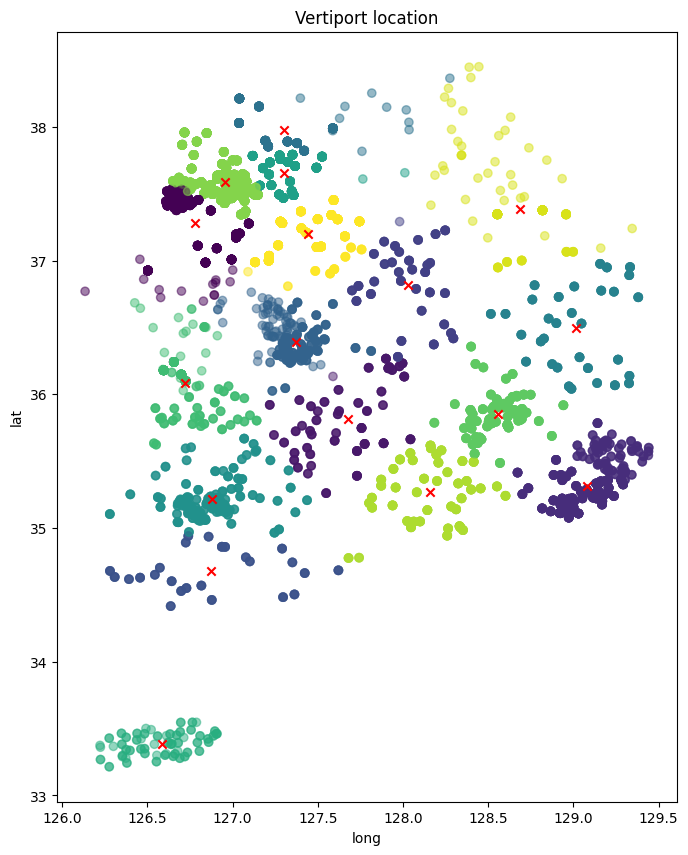

초기 중심점에서 가장 가까운 점들:
      Longitude (deg)  Latitude (deg)
3437       126.872287       37.374942
6253       127.617099       35.851296
1457       129.077694       35.287533
5683       127.987621       36.848668
6542       126.816947       34.569957
2994       127.349777       36.403398
3462       127.322035       37.890884
6794       129.046941       36.529973
2784       126.890503       35.225592
3458       127.336761       37.592389
7722       126.621901       33.396161
5912       126.725099       36.098771
1974       128.520971       35.826762
27         126.958415       37.568619
7173       128.080643       35.267943
5490       128.689629       37.468425
3465       127.431361       37.210443


In [ ]:
# 위도와 경도 추출
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# 데이터 준비 (위도, 경도를 하나의 배열로 만들기)
coordinates = pd.concat([latitude, longitude], axis=1)

# K-means 알고리즘을 사용하여 17개의 초기 중심점을 설정하고 그룹 나누기
kmeans = KMeans(n_clusters=17, n_init='auto', random_state=0).fit(coordinates)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 위치 시각화
plt.figure(figsize=(8, 10))
plt.scatter(longitude, latitude, c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')
plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

# 초기 중심점에서 가장 가까운 점들 추출
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# 결과 출력
print("초기 중심점에서 가장 가까운 점들:")
print(closest_points)

In [ ]:
# 클러스터 결과를 데이터 프레임으로 생성
cluster, counts = np.unique(labels, return_counts=True)
result_Kmeans = pd.DataFrame({'Cluster':cluster, 'Counts':counts, 'Proportion':100*counts/len(coordinates)})

In [ ]:
# 데이터 프레임 확인
result_Kmeans

,Cluster,Counts,Proportion
0,0,694,8.927193
1,1,211,2.714175
2,2,772,9.930538
3,3,189,2.431181
4,4,116,1.492153
5,5,344,4.425006
6,6,302,3.884744
7,7,203,2.611268
8,8,408,5.248263
9,9,537,6.907641


### Constrained K-means

In [ ]:
# constrained K means 모듈
from k_means_constrained import KMeansConstrained

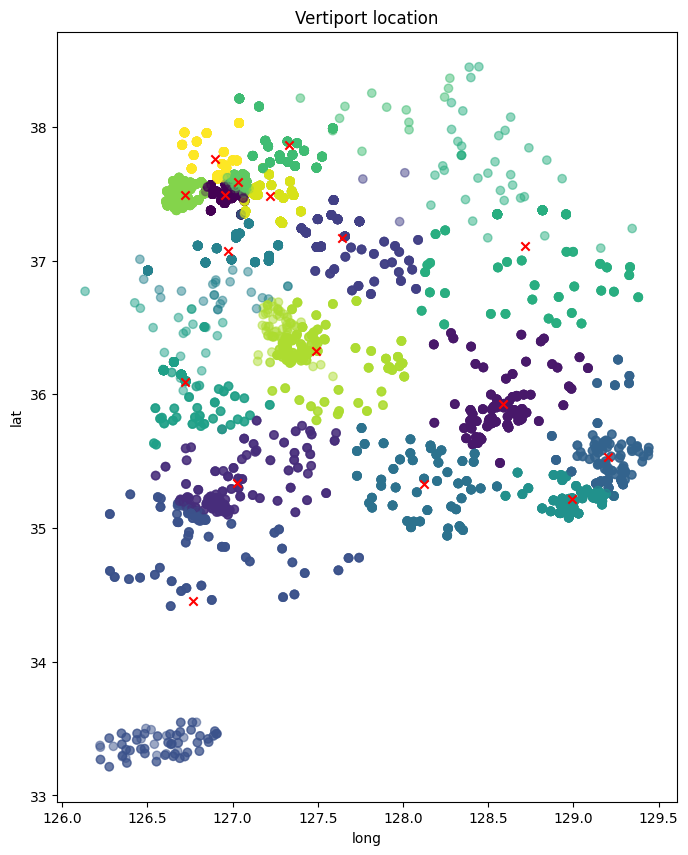

초기 중심점에서 가장 가까운 점들:
      Longitude (deg)  Latitude (deg)
2          126.939432       37.492020
1949       128.591607       35.929673
6512       127.034755       35.299764
3441       127.659152       37.181727
6558       126.698279       34.529390
3210       129.221195       35.536087
7193       128.123432       35.369602
3442       126.994043       37.008560
1475       128.992724       35.223265
5912       126.725099       36.098771
6782       128.696165       37.001144
3462       127.322035       37.890884
50         127.048405       37.604407
2342       126.712357       37.503852
2977       127.491766       36.329544
3445       127.273506       37.494661
3477       126.938483       37.723465


In [ ]:
# 위도와 경도 추출
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']

# 데이터 준비 (위도, 경도를 하나의 배열로 만들기)
coordinates = pd.concat([latitude, longitude], axis=1)

# Constrained K-means 알고리즘을 사용하여 17개의 초기 중심점을 설정하고 그룹 나누기
C_kmeans = KMeansConstrained(
     n_clusters=17,
     size_min=350,
     size_max=550,
     random_state=0
)
C_kmeans.fit(coordinates)

labels = C_kmeans.labels_
centroids = C_kmeans.cluster_centers_

# 위치 시각화
plt.figure(figsize=(8, 10))
plt.scatter(longitude, latitude, c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red')
plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

# 초기 중심점에서 가장 가까운 점들 추출
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# 결과 출력
print("초기 중심점에서 가장 가까운 점들:")
print(closest_points)

In [ ]:
# 클러스터 결과를 데이터 프레임으로 생성
cluster, counts = np.unique(labels, return_counts=True)
result_Kmeans = pd.DataFrame({'Cluster':cluster, 'Counts':counts, 'Proportion':100*counts/len(coordinates)})

In [ ]:
# 데이터 프레임 확인
result_Kmeans

,Cluster,Counts,Proportion
0,0,550,7.074865
1,1,535,6.881914
2,2,350,4.502187
3,3,428,5.505531
4,4,350,4.502187
5,5,350,4.502187
6,6,391,5.029586
7,7,451,5.801389
8,8,468,6.020067
9,9,350,4.502187


### Constrained K-means + Jeju island dropout

In [ ]:
# 위도 34도 기준으로 제주도의 점들 분리
data_drop = data.drop(data[data['Latitude (deg)']<34].index)
data_jeju = data.drop(data[data['Latitude (deg)']>34].index)

In [ ]:
# 위도와 경도 추출
latitude = data_drop['Latitude (deg)']
longitude = data_drop['Longitude (deg)']

In [ ]:
# 데이터 준비 (위도, 경도를 하나의 배열로 만들기)
coordinates = pd.concat([latitude, longitude], axis=1)

# Constrained K-means 알고리즘을 사용하여 16개의 초기 중심점을 설정하고 그룹 나누기 (제주도 제외)
C_kmeans = KMeansConstrained(
     n_clusters=16,
     size_min=350,
     size_max=550,
     random_state=0
)
C_kmeans.fit(coordinates)

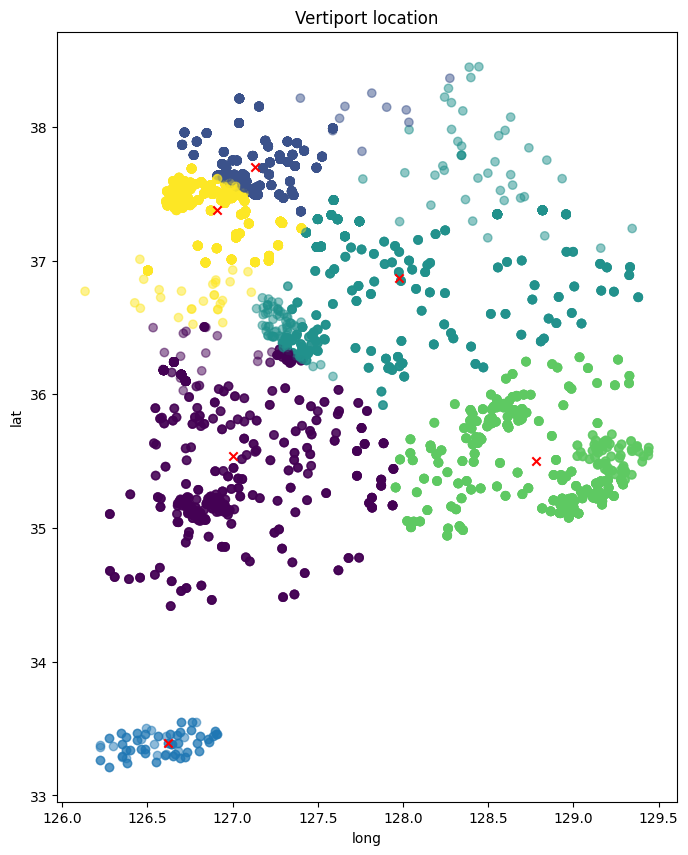

초기 중심점에서 가장 가까운 점들:
      Longitude (deg)  Latitude (deg)
6302       127.054603       35.515018
3461       127.178650       37.691536
5683       127.987621       36.848668
7198       128.897474       35.510132
3437       126.872287       37.374942


In [ ]:
# 레이블과 중심점 생성
labels = C_kmeans.labels_
centroids = C_kmeans.cluster_centers_

# 위치 시각화
plt.figure(figsize=(8, 10))

plt.scatter(longitude, latitude, c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', color='red') # 본토

plt.scatter(data_jeju['Longitude (deg)'], data_jeju['Latitude (deg)'], alpha=0.5)
plt.scatter([126.621901], [33.396161], marker='x', color='red') # 제주도

plt.title('Vertiport location')
plt.xlabel('long')
plt.ylabel('lat')
plt.show()

# 초기 중심점에서 가장 가까운 점들 추출
distances = cdist(centroids, coordinates, metric='euclidean')
closest_points_indices = distances.argmin(axis=1)
closest_points = data.iloc[closest_points_indices]

# 결과 출력
print("초기 중심점에서 가장 가까운 점들:")
print(closest_points)

# 3-3 최적의 Vertiport K 찾기

### elbow 기법 (오차제곱합의 값이 최소가 되도록 결정)

In [ ]:
from sklearn.cluster import KMeans # 일반 K means 모듈
from k_means_constrained import KMeansConstrained # constrained K means 모듈

##### 1. K-means

In [ ]:
# 데이터 준비
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']
coordinates = pd.concat([latitude, longitude], axis=1)

In [ ]:
# 엘보우 기법 함수 정의 1
def elbow_Kmeans(data, length):
    # sum of square error 오차제곱합
    sse = []

    for i in range(2, length):
        # K means 적용
        kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
        kmeans.fit(data)

        # SSE 값 저장
        sse.append(kmeans.inertia_)

    # 시각화
    plt.plot(range(2, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

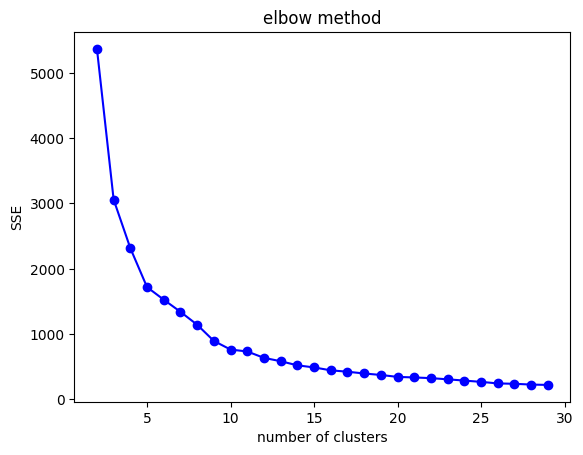

In [ ]:
elbow_Kmeans(coordinates, 30)

In [ ]:
# 엘보우 기법 함수 정의 2
def visualize_inertia(cluster_lists, X_features):

    inertias = []

    for n_cluster in cluster_lists:
        k_means = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        k_means.fit(X_features)
        inertias.append(k_means.inertia_)

    plt.plot(cluster_lists, inertias, 'bx-')

In [ ]:
# K-means 알고리즘을 사용하여 최적의 군집 개수 찾기
distortions = []
k_values = range(2, 51)  # 군집 개수 범위 설정

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    kmeans.fit(data[['Longitude (deg)', 'Latitude (deg)']])
    distortions.append(kmeans.inertia_)

# 엘보우 방법을 사용하여 최적의 군집 개수 결정
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

##### 2. Constrained K-means

In [ ]:
# 데이터 준비
latitude = data['Latitude (deg)']
longitude = data['Longitude (deg)']
coordinates = pd.concat([latitude, longitude], axis=1)

In [ ]:
# 엘보우 기법 함수 정의
def elbow_C_Kmeans(data, length):
    # sum of square error 오차제곱합
    sse = []
    n_total_points = len(data)

    for i in range(2, length):
        n_clusters = i

        # Constrained K-means 적용
        C_kmeans = KMeansConstrained(
        n_clusters=n_clusters,
        size_min=np.trunc(n_total_points/n_clusters*0.75),
        size_max=np.trunc(n_total_points/n_clusters*1.25),
        random_state=0
        )
        C_kmeans.fit_predict(coordinates)

        # SSE 값 저장
        sse.append(C_kmeans.inertia_)

    sse_sum = [x + add for x in sse]

    # 시각화
    plt.plot(range(2, length), sse_sum, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

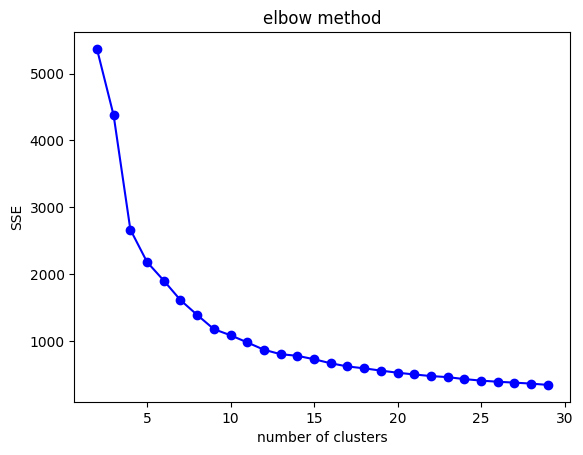

In [ ]:
elbow_C_Kmeans(coordinates, 30)

##### Constrained K-means + Jeju island dropout

In [ ]:
# jeju 데이터 준비
latitude = data_jeju['Latitude (deg)']
longitude = data_jeju['Longitude (deg)']
coordinates = pd.concat([latitude, longitude], axis=1)

In [ ]:
# 제주도의 SSE를 별개로 계산
kmeans = KMeans(n_clusters=1, n_init='auto', random_state=0)
kmeans.fit(coordinates)
sse_jeju = kmeans.inertia_

In [ ]:
# drop 데이터 준비
latitude = data_drop['Latitude (deg)']
longitude = data_drop['Longitude (deg)']
coordinates = pd.concat([latitude, longitude], axis=1)

In [ ]:
# 엘보우 기법 함수 정의
def elbow_C_Kmeans_drop(data, add, length):
    # sum of square error 오차제곱합
    sse = []
    n_total_points = len(data)

    kmeans = KMeans(n_clusters=1, n_init='auto', random_state=0)
    kmeans.fit(coordinates)
    sse.append(kmeans.inertia_)


    for i in range(2, length-1):
        n_clusters = i

        # Constrained K-means 적용
        C_kmeans = KMeansConstrained(
        n_clusters=n_clusters,
        size_min=np.trunc(n_total_points/n_clusters*0.75),
        size_max=np.trunc(n_total_points/n_clusters*1.25),
        random_state=0
        )
        C_kmeans.fit_predict(coordinates)

        # SSE 값 저장
        sse.append(C_kmeans.inertia_)

    sse_sum = [x + add for x in sse]

    # 시각화
    plt.plot(range(2, length), sse_sum, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()

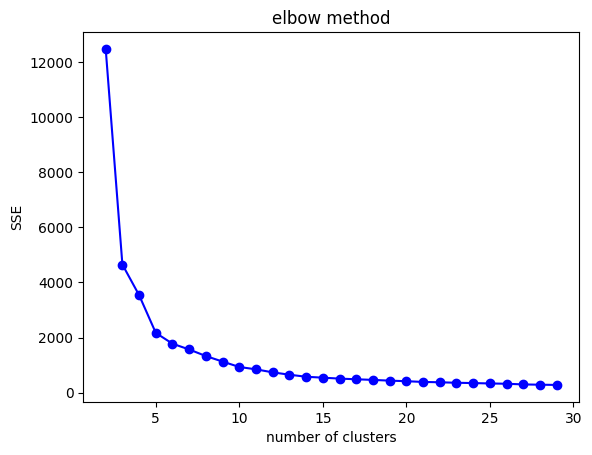

In [ ]:
elbow_C_Kmeans_drop(coordinates, sse_jeju, 30)

### 실루엣 시각화

In [ ]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


def visualize_silhouette(cluster_lists, X_features):
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")



visualize_silhouette([2, 3, 4, 5], data)